In [2]:
# Lets get an overview of how many languages / authors / books are we working with.
import os

bookspath = "books"
for root, dirs, files in os.walk(bookspath):
    level = root.replace(bookspath, "").count(os.sep)
    indent = " " * 2 * (level)
    print("{}{}/".format(indent, os.path.basename(root)))
    subindent = " " * 2 * (level + 1)
    for f in files:
        print("{}{}".format(subindent, f))

books/
  Portuguese/
    Queir¢s/
      A correspondància de Fradique Mendes.txt
      Os Maias.txt
      A Illustre Casa de Ramires.txt
      O Mandarim.txt
      Cartas de Inglaterra.txt
      A Rel°quia.txt
      A Cidade e as Serras.txt
      O crime do padre Amaro.txt
      O Primo Bazilio.txt
    shakespeare/
      Hamlet.txt
    branco/
      Estrellas Prop°cias.txt
      Scenas Contemporaneas.txt
      A Queda d'um Anjo.txt
      Estrellas Funestas.txt
      O Olho de Vidro.txt
      Annos de Prosa.txt
      Amor de Salvação.txt
      O Regicida.txt
      A Filha do Arcediago.txt
      Agulha em Palheiro.txt
      Lagrimas Abenáoadas.txt
      O que fazem mulheres.txt
      Livro de Consolação.txt
      A Neta do Arcediago.txt
      Carlota Angela.txt
      Amor de Perdição.txt
    dinis/
      A Morgadinha dos Cannaviaes.txt
      Os fidalgos da Casa Mourisca.txt
      Uma fam°lia ingleza.txt
  German/
    raimund/
      Die unheilbringende Krone.txt
      Moisasurs Za

In [4]:
import re
from collections import Counter

def readbook(path):
    '''
    input : str(path)
    Reads books; cleans them and returns for futher processing.
    Returns str() of the book.
    '''
    textbook = ""
    with open(path, "r", encoding="utf8") as f:
        textbook = f.read()
    # cleaning the book of special characters
    textbook = textbook.lower()
    textbook = re.sub(
        r"[0-9]|\n|\r|\ufeff|\.|,|:|;|\*|/|!|'|\"|#|=|-|\?|!",
        "",
        textbook
    )
    textbook = textbook.replace("(", "") \
            .replace(")", "") \
            .replace("<", "") \
            .replace(">", "") \
            .replace("[", "") \
            .replace("]", "") \
            .replace("{", "") \
            .replace("}", "")
    return textbook

def wordcounter(book):
    '''
    input : str(bookpath)
    Calls the readbook() and then further processes them into total word count & unique word count.
    Returs a tuple of (totalwordscount, uniquewordscount).
    '''
    textbook = readbook(book)
    words = textbook.split(" ")
    wordscount = Counter(words)
    return (sum(wordscount.values()), len(wordscount))

In [67]:
import pandas as pd

statistics = pd.DataFrame(columns=("language", "author", "title", "total_words", "unique_words"))
statistics

,language,author,title,total_words,unique_words


In [68]:
for root, dirs, files in os.walk(bookspath):
    for f in files:
        total_words, unique_words = wordcounter(root + os.sep + f)
        la = root.split(os.sep)
        statistics = statistics.append(
            {
                'language': la[1],
                'author': la[2].capitalize(),
                'title': f.replace(".txt", ""),
                'total_words': int(total_words),
                'unique_words': int(unique_words)
            },
            ignore_index=True
        )
statistics.tail()

,language,author,title,total_words,unique_words
97,English,Shakespeare,A Midsummer Night's Dream,16103,4340
98,English,Shakespeare,Romeo and Juliet,40776,4444
99,English,Shakespeare,Richard III,48315,4844
100,English,Shakespeare,Macbeth,16874,4775
101,English,Shakespeare,The Merchant of Venice,20949,4978


In [81]:
statistics.shape

(102, 5)

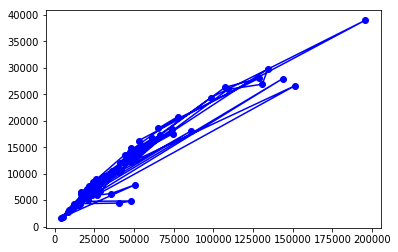

In [74]:
import matplotlib.pyplot as plt

plt.plot(statistics.total_words, statistics.unique_words, "bo-")
plt.show()

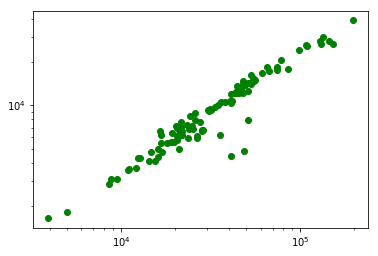

In [75]:
plt.loglog(statistics.total_words, statistics.unique_words, "go")
plt.show()

In [76]:
statistics["unique_words"] = statistics["unique_words"].astype('int64')
statistics["total_words"] = statistics["total_words"].astype('int64')
statistics.dtypes

language        object
author          object
title           object
total_words      int64
unique_words     int64
dtype: object

In [77]:
statistics.loc[statistics["unique_words"].idxmax()] # maximum number of unique words

language        Portuguese
author             Queir¢s
title             Os Maias
total_words         195771
unique_words         39008
Name: 1, dtype: object

In [78]:
statistics.loc[statistics["unique_words"].idxmin()] # minimum number of unique words

language                           German
author                           Schiller
title           Die Huldigung der KÅnste
total_words                          3919
unique_words                         1642
Name: 48, dtype: object

In [79]:
statistics.language.unique()

array(['Portuguese', 'German', 'French', 'English'], dtype=object)

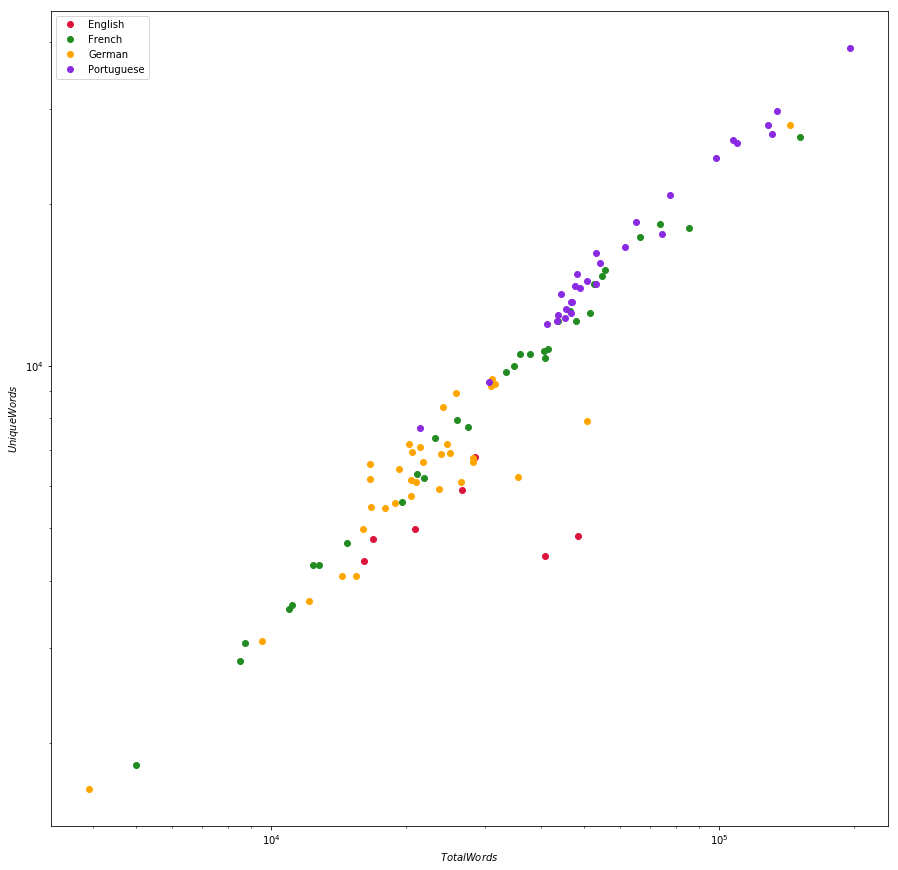

In [80]:
# Differenciate between languages
plt.figure(figsize=(15,15))
subset = statistics[statistics.language == "English"]
plt.loglog(subset.total_words, subset.unique_words, "o", label="English", color="crimson")
subset = statistics[statistics.language == "French"]
plt.loglog(subset.total_words, subset.unique_words, "o", label="French", color="forestgreen")
subset = statistics[statistics.language == "German"]
plt.loglog(subset.total_words, subset.unique_words, "o", label="German", color="orange")
subset = statistics[statistics.language == "Portuguese"]
plt.loglog(subset.total_words, subset.unique_words, "o", label="Portuguese", color="blueviolet")
plt.legend()
plt.xlabel("$Total Words$")
plt.ylabel("$Unique Words$")
plt.savefig("analysis.pdf")
plt.show()